## **NAME: Kandadi Deekshith Reddy**

# **Task 3 -The Spark Foundation Data Science & Business Analytics**

## **Prediction Using Decision Tree Algorithm**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Reading and Loading Data


In [ ]:
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# **Visualization of Data**

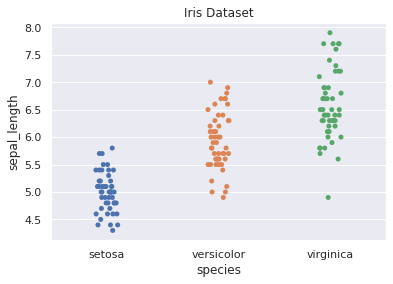

In [ ]:
# Using Strip Plot to draw a scatter plot based on the category
sns.set(style = 'darkgrid')
iris1 = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris1);
plt.title('Iris Dataset')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

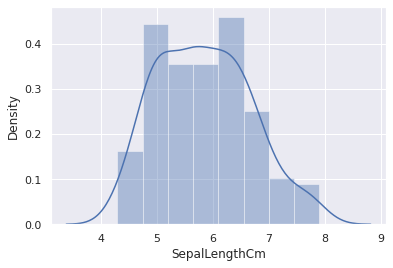

In [ ]:
sns.distplot(iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

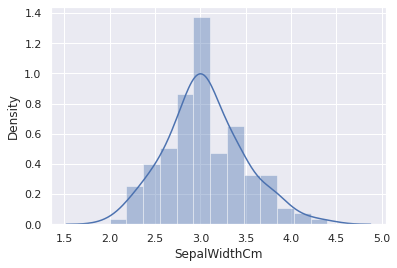

In [ ]:
sns.distplot(iris['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

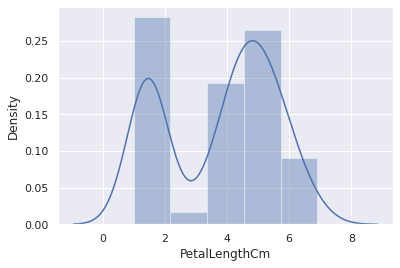

In [ ]:
sns.distplot(iris['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

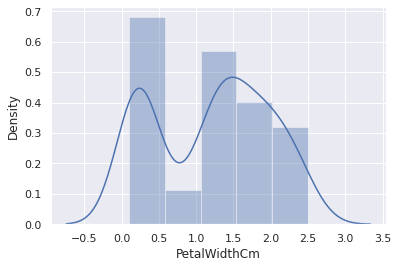

In [ ]:
sns.distplot(iris['PetalWidthCm'])

## **Correlation Plot**

<AxesSubplot:>

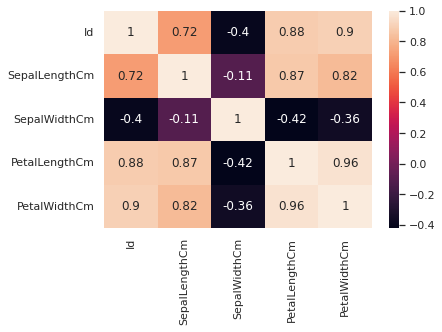

In [ ]:
sns.heatmap(iris.corr(), annot = True)

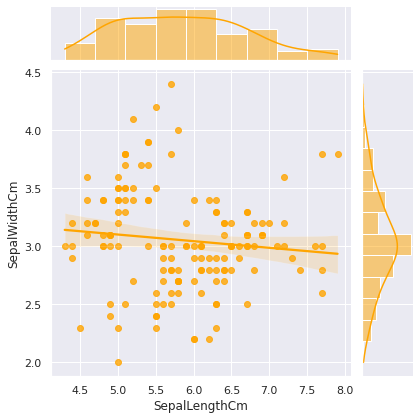

In [ ]:
sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", kind="reg", color='orange')

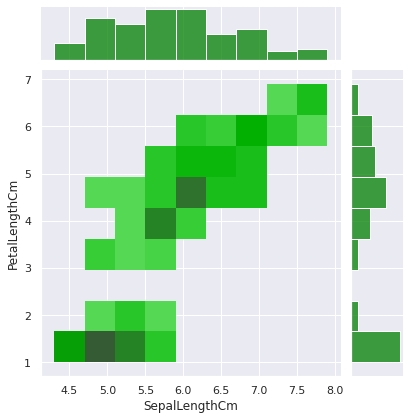

In [ ]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", kind="hist", color="green")

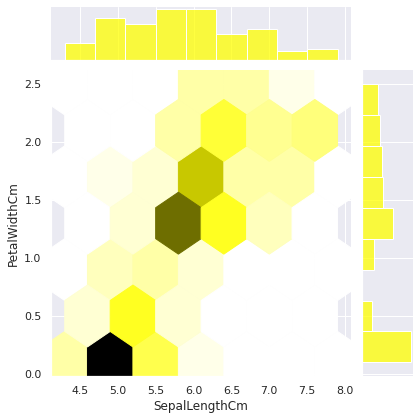

In [ ]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalWidthCm", kind="hex", color='yellow')

## **Observation**

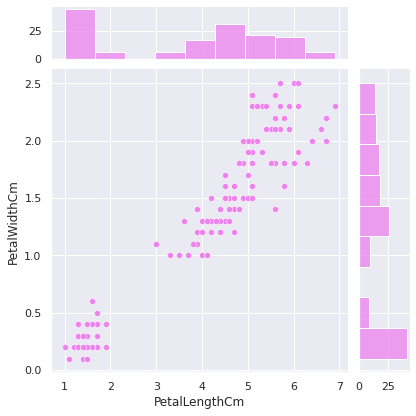

In [ ]:
sns.jointplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", marginal_ticks=True, color='violet')

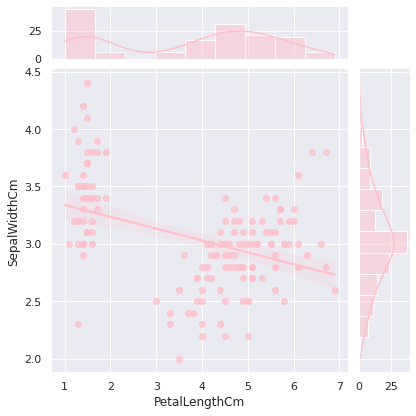

In [ ]:
sns.jointplot(data=iris, x="PetalLengthCm", y="SepalWidthCm", kind='reg', marginal_ticks=True, color='pink')

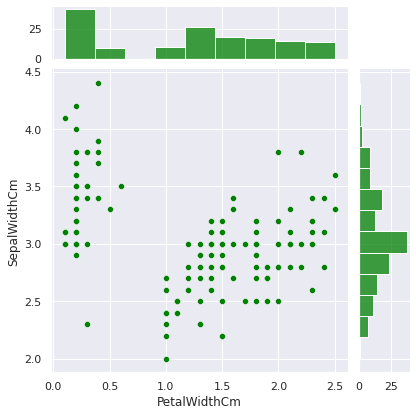

In [ ]:
sns.jointplot(data=iris, x="PetalWidthCm", y="SepalWidthCm", marginal_ticks=True, color='green')

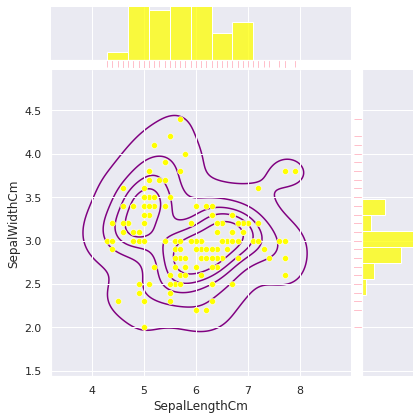

In [ ]:
# Using KDE plot to plot the data against a single/univariate variable.
# Using Rug plot to draw small bars along x-axis for each point in the dataset.
# jp is an acronym for Joint Plot
jp = sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", color='yellow')
jp.plot_joint(sns.kdeplot, color="purple", zorder=0, levels=6)
jp.plot_marginals(sns.rugplot, color="pink", height=-.15, clip_on=False)

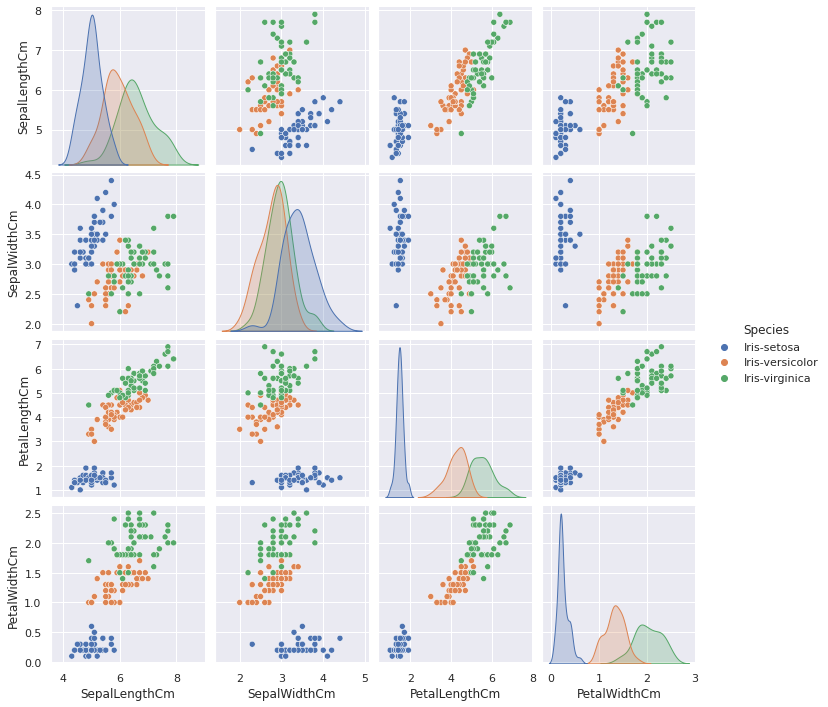

In [ ]:
sns.pairplot(iris.drop(['Id'], axis = 1), hue = 'Species')

## **Feature Engineering**

In [ ]:
# Here I just try to find some new feature with the help of existing features. 
# Taking difference of each feature with each other to get some more information and visualized it by using plots.
iris['SepalDiffCm'] = iris['SepalLengthCm'] - iris['SepalWidthCm']
iris['PetalDiffCm'] = iris['PetalLengthCm'] - iris['PetalWidthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


In [ ]:
iris['SepalPetalLenDiff'] = iris['SepalLengthCm'] - iris['PetalLengthCm']
iris['SepalPetalWidthDiff'] = iris['SepalWidthCm'] - iris['PetalWidthCm']
iris['SepalPetalLenWidthDiff'] = iris['SepalLengthCm'] - iris['PetalWidthCm']
iris['SepalPetalWidthLenDiff'] = iris['SepalWidthCm'] - iris['PetalLengthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm,SepalPetalLenDiff,SepalPetalWidthDiff,SepalPetalLenWidthDiff,SepalPetalWidthLenDiff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


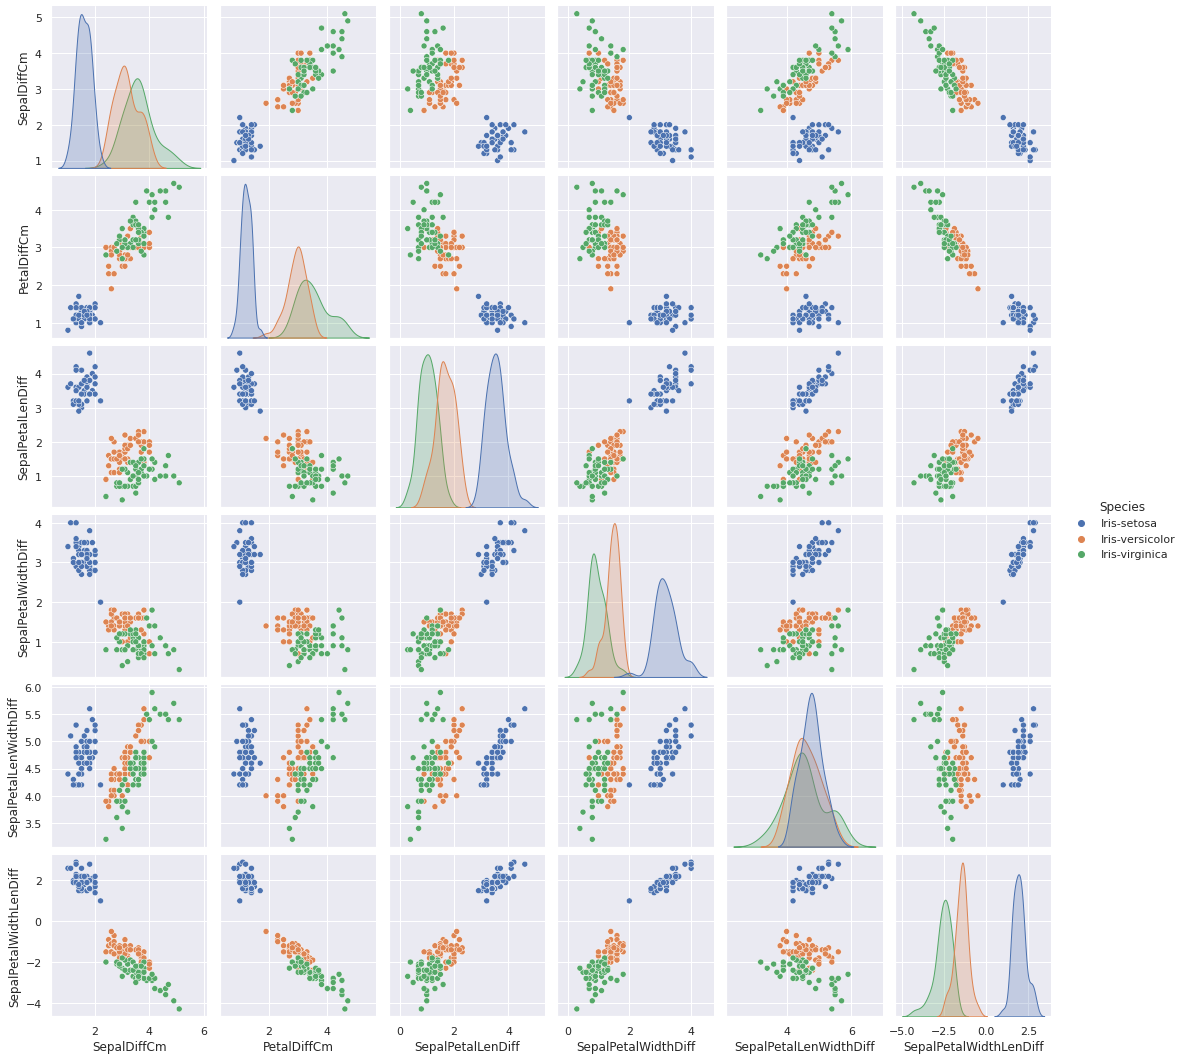

In [ ]:
sns.pairplot(iris[['Species','SepalDiffCm','PetalDiffCm','SepalPetalLenDiff','SepalPetalWidthDiff','SepalPetalLenWidthDiff',
                   'SepalPetalWidthLenDiff']], hue = 'Species')

## **Building Classification Model**

In [ ]:
# Dropping id column as it is of no use in model
iris.drop(['Id'], axis = 1, inplace = True)

In [ ]:
# Importing important libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Seperating dependent and independent variable
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','SepalPetalLenWidthDiff','SepalPetalWidthLenDiff']]
y = iris['Species']

In [ ]:
# Splitting our data into training, testing and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#splitting data into validation train and validation test set
Xt,Xcv,yt,ycv = train_test_split(X_train,y_train,test_size = 0.1, random_state = 42)

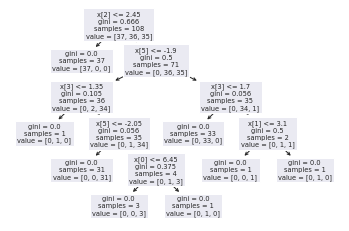

In [ ]:
# Creating decision tree classifier and training it with training set
dtr = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
dtr.fit(Xt,yt)

# Visualizing the tree which is formed on training set
tree.plot_tree(dtr)
plt.rcParams['figure.figsize']=(20,20)

## **Feeding A New Data To Predict The Class**

In [ ]:
# Testing our model on a random test case
# Predicted label should be Iris-virginica
trial = np.array([[7.2,3.0,5.8,1.6,5.6,-2.8]]) 
pred_trial = dtr.predict(trial)
pred_trial

array(['Iris-virginica'], dtype=object)

## **Visualisation of the Decision Tree**



In [ ]:
# As our model has been trained….
# Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.
print('Accuracy: ', cross_val_score(dtr , Xt , yt , cv = 3 , scoring = 'accuracy').mean())

Accuracy:  0.9351851851851851


In [ ]:
# Checking validation test data on our trained model and getting performance metrics
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
y_hat = dtr.predict(Xcv)

print('Accuracy of validation test data is:', accuracy_score(ycv,y_hat))
multilabel_confusion_matrix(ycv,y_hat)

Accuracy of validation test data is: 0.8333333333333334


array([[[9, 0],
        [0, 3]],

       [[7, 0],
        [2, 3]],

       [[6, 2],
        [0, 4]]])

In [ ]:
# Checking model performance on unseen test data
yt_hat = dtr.predict(X_test)
yt_hat

print('Accuracy score for unseen test data is:',accuracy_score(y_test,yt_hat)*100,'%' )
multilabel_confusion_matrix(y_test,yt_hat)

Accuracy score for unseen test data is: 90.0 %


array([[[20,  0],
        [ 0, 10]],

       [[19,  2],
        [ 1,  8]],

       [[18,  1],
        [ 2,  9]]])

In [ ]:
target = list(iris.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

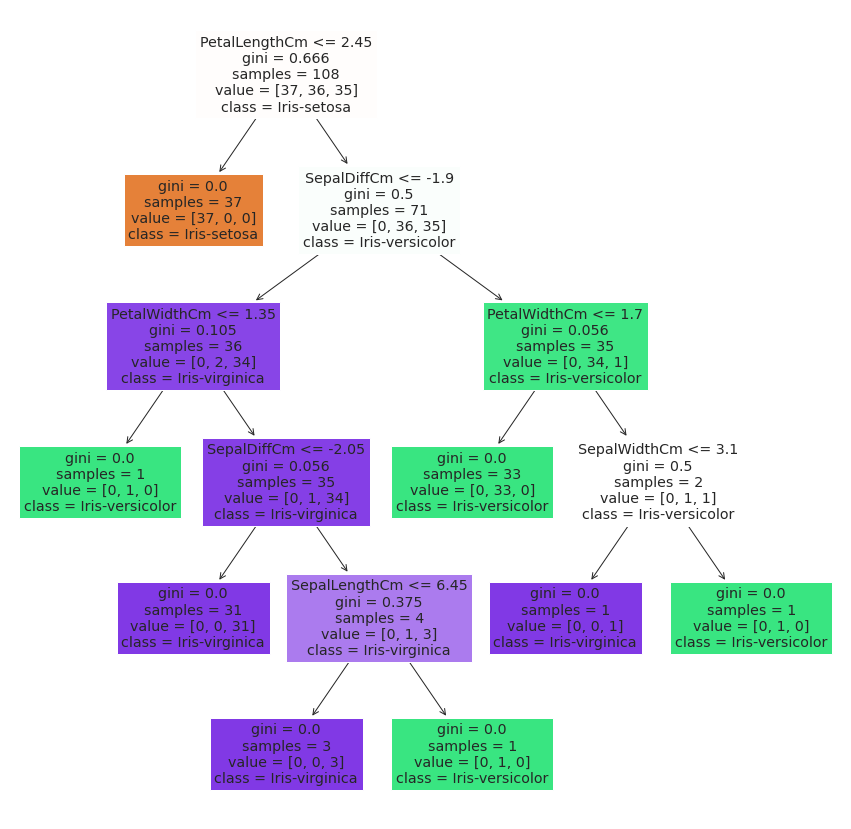

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(dtr, feature_names=iris.columns, class_names=target, filled=True)
plt.rcParams['figure.figsize']=(15,15)

###                           **THE END**